# Class 2

1. Discuss programming event
2. Continue with previous class

In [39]:
class Planet():
    G = 6.67e-11
    M_SUN = 1.989e30
    def __init__(self, name, mass, position, orbital_velocity):
        self.name = name
        self.mass = mass
        self.orbital_velocity = np.array(orbital_velocity, dtype=np.float64)    # lists
        self.position = np.array(position, dtype=np.float64)                   # lists
        self.positions = []
        self.time_step = 86400

    def apply_force(self, force, dt):
        a = force/self.mass
        self.orbital_velocity += a * dt

    def update_position(self, dt):
        self.position += self.orbital_velocity * dt
        self.positions.append(self.position.copy())


    def calc_distance(self, other):
        return dist(self.position, other.position)


import numpy as np
def dist(p1, p2):
    sum_sqs = 0
    for i in range(len(p1)):
        sum_sqs += (p2[i] - p1[i])**2

    return np.sqrt(sum_sqs)


def gravitational_force(planet, sun, G=6.67430e-11):
    direction_vecor = sun.position - planet.position
    distance = planet.calc_distance(sun)

    g_force = G * (sun.mass * planet.mass) / distance**2

    return (direction_vecor/distance) * g_force


def simulate(planets, sun, time_span, dt):
    for t in range(0, time_span, dt):
        for planet in planets:
            force = gravitational_force(planet, sun)

            planet.apply_force(force, dt)

            planet.update_position(dt)


from matplotlib import pyplot as plt

def plot_orbits(planets, sun, step):
    plt.figure(figsize=(8, 8))
    plt.title(f"Simulation Step {step}")
    
    # Plot the Sun
    plt.scatter(sun.position[0], sun.position[1], color='yellow', label='Sun', s=100)
    
    # Plot each planet's orbit
    for planet in planets:
        positions = np.array(planet.positions)
        plt.plot(positions[:, 0], positions[:, 1], label=f"Planet (m={planet.mass:.2e} kg)")
        plt.scatter(positions[-1, 0], positions[-1, 1])  # Current position

    plt.xlabel('X Position (m)')
    plt.ylabel('Y Position (m)')
    plt.legend()
    plt.xlim(-4e11, 4e11)  # Adjust these limits based on the simulation scale
    plt.ylim(-4e11, 4e11)
    plt.grid(True)
    plt.show()




In [43]:
Sun = Planet("Sun", 1.988e30, [0, 0], [1e-10, 1e-10])
Earth = Planet("Earth", 5.97219e24, [1.496e11, 0], [0, 29783])
Mars = Planet("Mars", 6.4171e23, [2.279e11, 0], [0, 24100])
Mercury = Planet("Mercury", 3.285e23, [68.813e9, 0], [0, 47360])

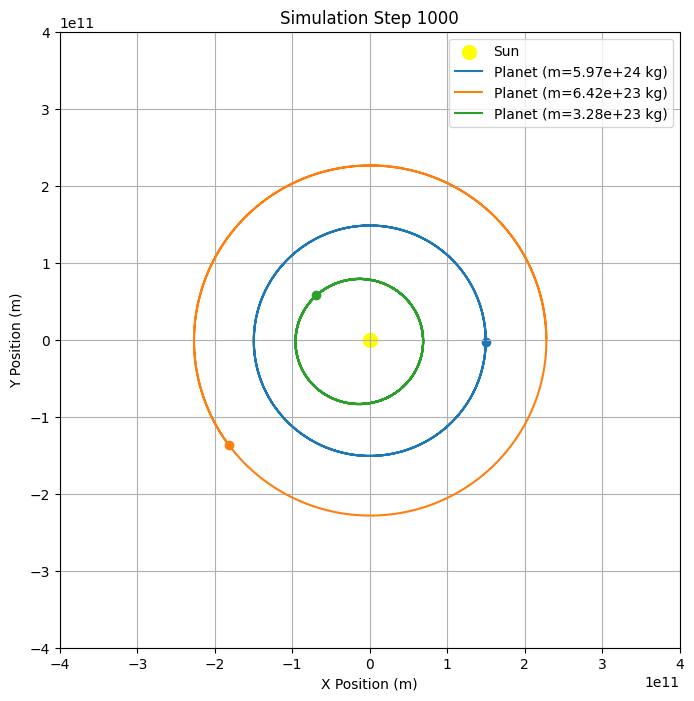

In [46]:
simulate([Earth, Mars, Mercury], Sun, 31536000, 86400)
plot_orbits([Earth, Mars, Mercury], Sun, 1000)